# Source of Data
The San Francisco Controller's Office maintains a database of the salary and benefits

paid to City employees since fiscal year 2013. This data is summarized and presented on

the Employee Compensation and is also

Overview of the problem

Description of Data : Each row is an employee, and has columns about employee's information like their job type,salary, hours of overtime,other benefits etc.Overall there are 22 columns.

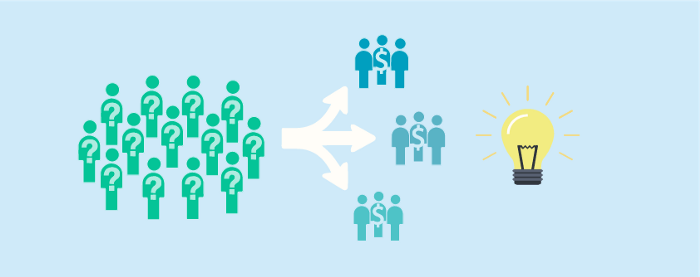

In [1]:
from IPython.display import Image
Image(filename='K.png')

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('employee-compensation.csv')
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [5]:
df.shape

(683277, 22)

In [6]:
df.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [7]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4), '% missing values')
else:
    print("no missing value found")

Department Code 0.0 % missing values
Department 0.0 % missing values
Union Code 0.0005 % missing values
Union 0.0005 % missing values
Job 0.0 % missing values
no missing value found


In [8]:
df.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [9]:
df=df.drop(['Union Code'],axis=1)

In [10]:
df.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

In [11]:
for feature in df.columns:
    if df[feature].dtypes == 'object':
        df[feature] = pd.Categorical(df[feature]).codes

In [12]:
df.dtypes

Organization Group Code      int64
Job Family Code               int8
Job Code                     int16
Year Type                     int8
Year                         int64
Organization Group            int8
Department Code               int8
Department                    int8
Union                        int16
Job Family                    int8
Job                          int16
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

In [13]:
col_name=df.columns
for i in col_name:
    print(i,'has :',df[i].nunique(),"Unique values")

Organization Group Code has : 7 Unique values
Job Family Code has : 59 Unique values
Job Code has : 1210 Unique values
Year Type has : 2 Unique values
Year has : 8 Unique values
Organization Group has : 7 Unique values
Department Code has : 61 Unique values
Department has : 110 Unique values
Union has : 130 Unique values
Job Family has : 59 Unique values
Job has : 1350 Unique values
Employee Identifier has : 309750 Unique values
Salaries has : 498512 Unique values
Overtime has : 262033 Unique values
Other Salaries has : 307854 Unique values
Total Salary has : 615223 Unique values
Retirement has : 451716 Unique values
Health and Dental has : 209969 Unique values
Other Benefits has : 496200 Unique values
Total Benefits has : 616499 Unique values
Total Compensation has : 658692 Unique values


In [14]:
df=df.drop(['Year Type','Organization Group Code','Job Family Code','Year','Organization Group','Department Code','Job Family'],axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683277 entries, 0 to 683276
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Job Code             683277 non-null  int16  
 1   Department           683277 non-null  int8   
 2   Union                683277 non-null  int16  
 3   Job                  683277 non-null  int16  
 4   Employee Identifier  683277 non-null  int64  
 5   Salaries             683277 non-null  float64
 6   Overtime             683277 non-null  float64
 7   Other Salaries       683277 non-null  float64
 8   Total Salary         683277 non-null  float64
 9   Retirement           683277 non-null  float64
 10  Health and Dental    683277 non-null  float64
 11  Other Benefits       683277 non-null  float64
 12  Total Benefits       683277 non-null  float64
 13  Total Compensation   683277 non-null  float64
dtypes: float64(9), int16(3), int64(1), int8(1)
memory usage: 56.7 MB


In [16]:
print(df['Salaries'].unique())

[ 57534.65  57678.5   63532.93 ...   9416.71  96475.   115943.  ]


In [17]:
df.describe()

,Job Code,Department,Union,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,683277.000000,683277.000000,683277.000000,683277.000000,6.832770e+05,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000
mean,676.651062,63.842395,84.436002,771.010011,1.708711e+07,69466.271313,5474.598046,3820.481201,78571.040544,13658.900273,9946.864621,5038.753940,28644.518833,107215.559377
std,388.592075,27.618269,25.385942,344.291094,1.925902e+07,47771.799981,13110.029734,8386.602694,55751.218659,10110.075388,5732.982236,3787.981426,17869.713199,72291.710218
min,0.000000,-1.000000,-1.000000,-1.000000,0.000000e+00,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,329.000000,38.000000,80.000000,524.000000,2.545000e+04,29009.540000,0.000000,0.000000,31676.040000,4662.960000,4780.680000,1870.410000,11716.230000,44439.440000
50%,658.000000,76.000000,95.000000,840.000000,5.097500e+04,67899.360000,0.000000,706.240000,74870.420000,13858.160000,12500.590000,4876.550000,32521.370000,107529.240000
75%,1053.000000,87.000000,98.000000,1018.000000,3.737703e+07,100416.890000,4223.390000,4362.880000,112666.100000,20151.850000,14037.160000,7525.560000,40915.930000,154170.540000
max,1209.000000,108.000000,128.000000,1348.000000,4.434643e+07,651936.710000,321523.310000,568163.120000,658867.570000,121952.520000,59405.230000,36815.390000,151645.180000,807625.250000


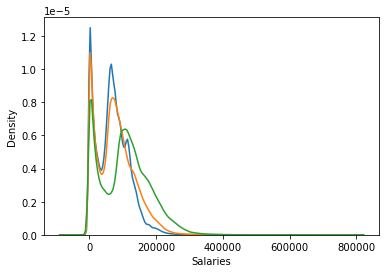

In [18]:
salaries =['Salaries','Total Salary','Total Compensation',]
for col in salaries:
    ax_salaries=sns.kdeplot(df[col])
    ax_salaries

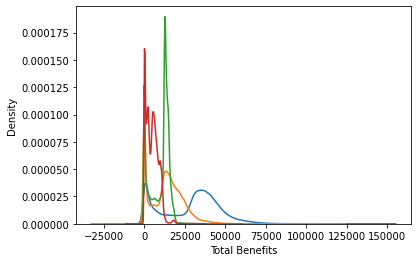

In [19]:
benefits= ['Total Benefits','Retirement','Health and Dental','Other Benefits']
for col in benefits:
    ax_benefits=sns.kdeplot(df[col])
    ax_benefits


In [20]:
df[df['Salaries']<200000].count()


Job Code               676369
Department             676369
Union                  676369
Job                    676369
Employee Identifier    676369
Salaries               676369
Overtime               676369
Other Salaries         676369
Total Salary           676369
Retirement             676369
Health and Dental      676369
Other Benefits         676369
Total Benefits         676369
Total Compensation     676369
dtype: int64

In [21]:
df = df[df['Salaries']<200000]
df = df[df['Salaries']>20000]

In [22]:
df.shape

(535003, 14)

In [23]:
headers=df.columns
print(len(headers))

14


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(df)

In [25]:
df=pd.DataFrame(df, columns=headers)
df.head()

,Job Code,Department,Union,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,-1.708931,-2.197947,0.123218,-0.457541,-0.905975,-0.724094,-0.478824,-0.532475,-0.834179,-0.678896,-0.041480,-0.474501,-0.561495,-0.800217
1,-1.703723,-2.197947,0.123218,-0.451780,-0.906553,-0.720147,-0.478824,-0.532475,-0.830986,-0.800011,-1.230306,-0.407283,-0.994871,-0.896526
2,-1.698514,-2.197947,0.123218,-0.388405,-0.907506,-0.559496,-0.478824,-0.532475,-0.701068,-0.523459,0.196283,-0.423121,-0.375800,-0.650600
3,-1.672472,-2.197947,0.123218,-0.440257,-0.906508,0.476166,-0.478824,-1.378450,-0.020167,0.370713,0.196283,0.409451,0.400368,0.075101
4,-1.662055,-2.197947,0.123218,-0.411450,-0.906053,-1.357392,-0.478824,-0.532475,-1.346328,-1.167615,-2.062482,-1.064384,-1.658083,-1.463062


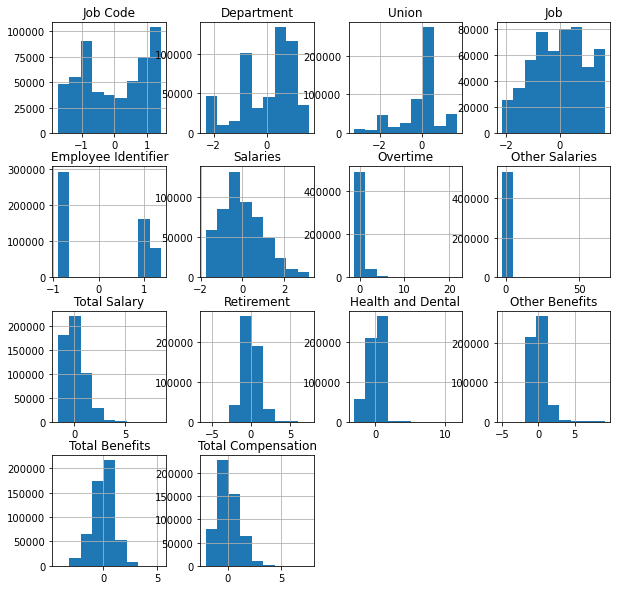

In [26]:
df.hist(bins = 9, figsize = (10,10));

(array([8.00000e+00, 1.30000e+01, 2.16200e+04, 1.42178e+05, 2.69801e+05,
        8.83180e+04, 1.17660e+04, 1.12800e+03, 1.40000e+02, 3.10000e+01]),
 array([-5.7925871 , -4.46665122, -3.14071535, -1.81477947, -0.4888436 ,
         0.83709228,  2.16302815,  3.48896403,  4.8148999 ,  6.14083577,
         7.46677165]),
 <BarContainer object of 10 artists>)

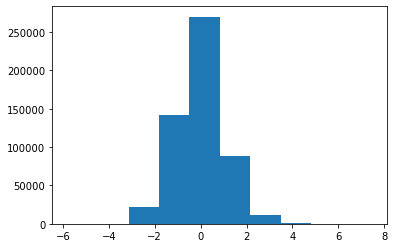

In [27]:
plt.hist(df.Retirement)

In [28]:
from sklearn.cluster import KMeans


In [29]:
kmeans=KMeans(n_clusters=5)

In [30]:
kmeans.fit(df)
print(kmeans.cluster_centers_)

[[ 0.11465283  0.00896797  0.19137719  0.1817616  -0.13438946 -1.23833792
  -0.38224471 -0.23990321 -1.17124038 -1.35722111 -1.69406068 -0.91745662
  -1.62256283 -1.31388829]
 [-0.27652337 -0.19810723 -0.17074832 -0.20682757  0.21924345  1.35109638
  -0.28824352  0.01613393  1.00542154  1.17562581  0.52315193  1.41342466
   1.26816756  1.0994264 ]
 [ 0.097344    0.6322132   0.58366088  0.55087668  0.48901    -0.22104841
   0.02163322 -0.2124519  -0.20982264 -0.14051364  0.39985167  0.10654817
   0.06571451 -0.15406194]
 [-0.56377366 -0.74763401  0.03829285 -0.43690596 -0.56306359 -0.32765837
  -0.34629352 -0.25497681 -0.42059303 -0.27566124  0.05430653 -0.0459743
  -0.16749893 -0.37709223]
 [ 1.07896865  0.44746455 -1.20595561 -0.18816718  0.03744186  0.91470871
   1.43441434  1.16027615  1.40771174  1.02289667  0.58070713 -0.70922327
   0.64000679  1.28023062]]


In [31]:
y=kmeans.labels_
print(y)

[3 3 3 ... 2 1 1]


In [32]:
df.head()

,Job Code,Department,Union,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,-1.708931,-2.197947,0.123218,-0.457541,-0.905975,-0.724094,-0.478824,-0.532475,-0.834179,-0.678896,-0.041480,-0.474501,-0.561495,-0.800217
1,-1.703723,-2.197947,0.123218,-0.451780,-0.906553,-0.720147,-0.478824,-0.532475,-0.830986,-0.800011,-1.230306,-0.407283,-0.994871,-0.896526
2,-1.698514,-2.197947,0.123218,-0.388405,-0.907506,-0.559496,-0.478824,-0.532475,-0.701068,-0.523459,0.196283,-0.423121,-0.375800,-0.650600
3,-1.672472,-2.197947,0.123218,-0.440257,-0.906508,0.476166,-0.478824,-1.378450,-0.020167,0.370713,0.196283,0.409451,0.400368,0.075101
4,-1.662055,-2.197947,0.123218,-0.411450,-0.906053,-1.357392,-0.478824,-0.532475,-1.346328,-1.167615,-2.062482,-1.064384,-1.658083,-1.463062


In [33]:
df['labels'] = kmeans.labels_
df.head()

,Job Code,Department,Union,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation,labels
0,-1.708931,-2.197947,0.123218,-0.457541,-0.905975,-0.724094,-0.478824,-0.532475,-0.834179,-0.678896,-0.041480,-0.474501,-0.561495,-0.800217,3
1,-1.703723,-2.197947,0.123218,-0.451780,-0.906553,-0.720147,-0.478824,-0.532475,-0.830986,-0.800011,-1.230306,-0.407283,-0.994871,-0.896526,3
2,-1.698514,-2.197947,0.123218,-0.388405,-0.907506,-0.559496,-0.478824,-0.532475,-0.701068,-0.523459,0.196283,-0.423121,-0.375800,-0.650600,3
3,-1.672472,-2.197947,0.123218,-0.440257,-0.906508,0.476166,-0.478824,-1.378450,-0.020167,0.370713,0.196283,0.409451,0.400368,0.075101,3
4,-1.662055,-2.197947,0.123218,-0.411450,-0.906053,-1.357392,-0.478824,-0.532475,-1.346328,-1.167615,-2.062482,-1.064384,-1.658083,-1.463062,0


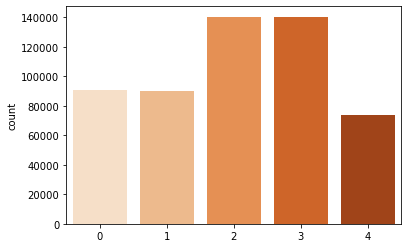

In [34]:
sns.countplot(x = kmeans.labels_, palette = 'Oranges')
plt.show();

Text(0, 0.5, 'Total Benefits')

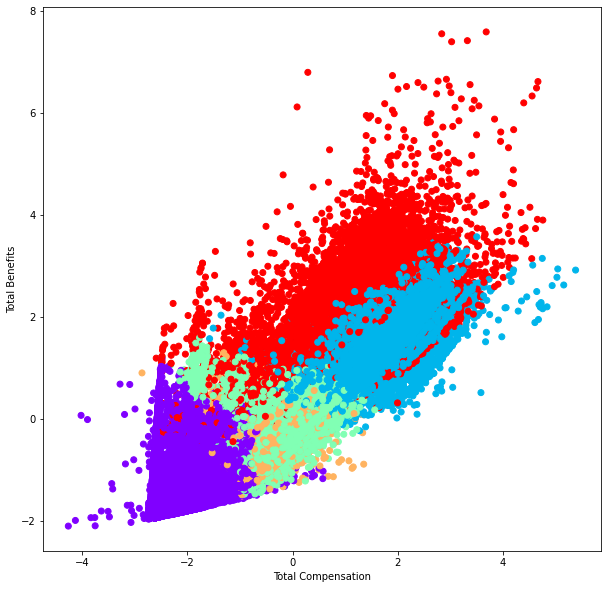

In [35]:
plt.figure(figsize = (10, 10))
plt.scatter(x = df['Total Benefits'], y = df['Total Compensation'],c=df['labels'], cmap='rainbow')
plt.xlabel('Total Compensation')
plt.ylabel('Total Benefits')


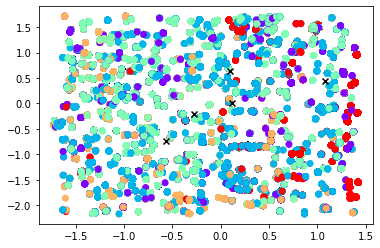

In [36]:
plt.scatter(df.iloc[:,0].values,df.iloc[:,3].values, c=kmeans.labels_, cmap="rainbow")
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.show()

In [37]:
df.head()

,Job Code,Department,Union,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation,labels
0,-1.708931,-2.197947,0.123218,-0.457541,-0.905975,-0.724094,-0.478824,-0.532475,-0.834179,-0.678896,-0.041480,-0.474501,-0.561495,-0.800217,3
1,-1.703723,-2.197947,0.123218,-0.451780,-0.906553,-0.720147,-0.478824,-0.532475,-0.830986,-0.800011,-1.230306,-0.407283,-0.994871,-0.896526,3
2,-1.698514,-2.197947,0.123218,-0.388405,-0.907506,-0.559496,-0.478824,-0.532475,-0.701068,-0.523459,0.196283,-0.423121,-0.375800,-0.650600,3
3,-1.672472,-2.197947,0.123218,-0.440257,-0.906508,0.476166,-0.478824,-1.378450,-0.020167,0.370713,0.196283,0.409451,0.400368,0.075101,3
4,-1.662055,-2.197947,0.123218,-0.411450,-0.906053,-1.357392,-0.478824,-0.532475,-1.346328,-1.167615,-2.062482,-1.064384,-1.658083,-1.463062,0


In [38]:
df.shape

(535003, 15)

In [39]:
df = df.drop(['labels'], axis = 1)
df.shape

(535003, 14)

In [40]:
df.columns

Index(['Job Code', 'Department', 'Union', 'Job', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

In [41]:
from sklearn.model_selection import train_test_split
train, test  = train_test_split(df, test_size = .02)


In [42]:
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from random import shuffle

In [43]:
test.shape

(10701, 14)

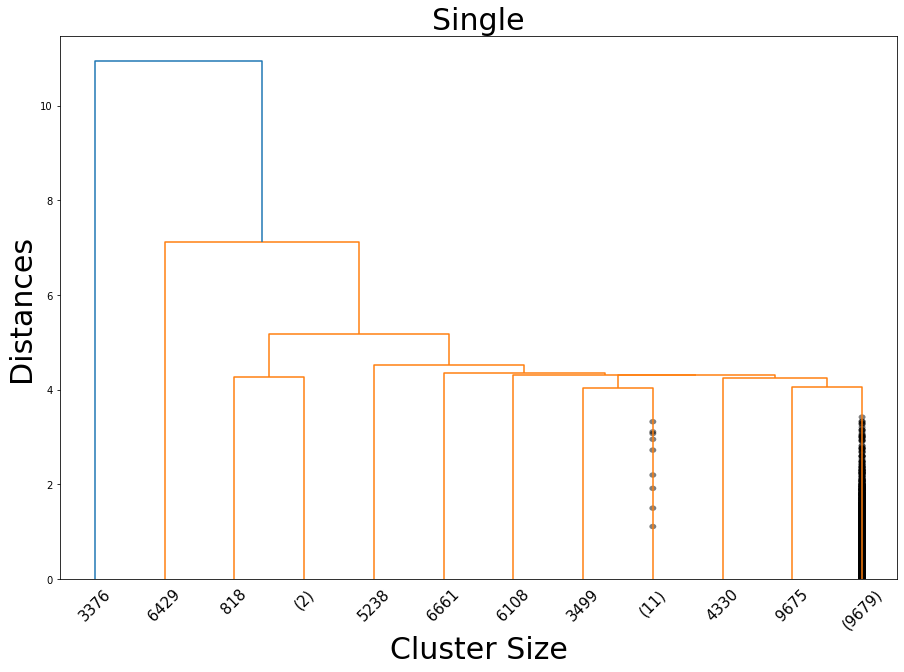

In [44]:
plt.figure(figsize = (15,10))
Z = linkage(test[1000:], method='single')
# print('Z-Shape:', Z.shape)
plt.title('Single', size = 30)
dendrogram(Z, orientation = 'top', truncate_mode = 'lastp', p=12, get_leaves = True, leaf_rotation = 45, leaf_font_size = 15, show_contracted = True)
plt.xlabel('Cluster Size', fontsize = 30)
plt.ylabel('Distances', fontsize = 30)
plt.show();

Z-Shape: (9700, 4)


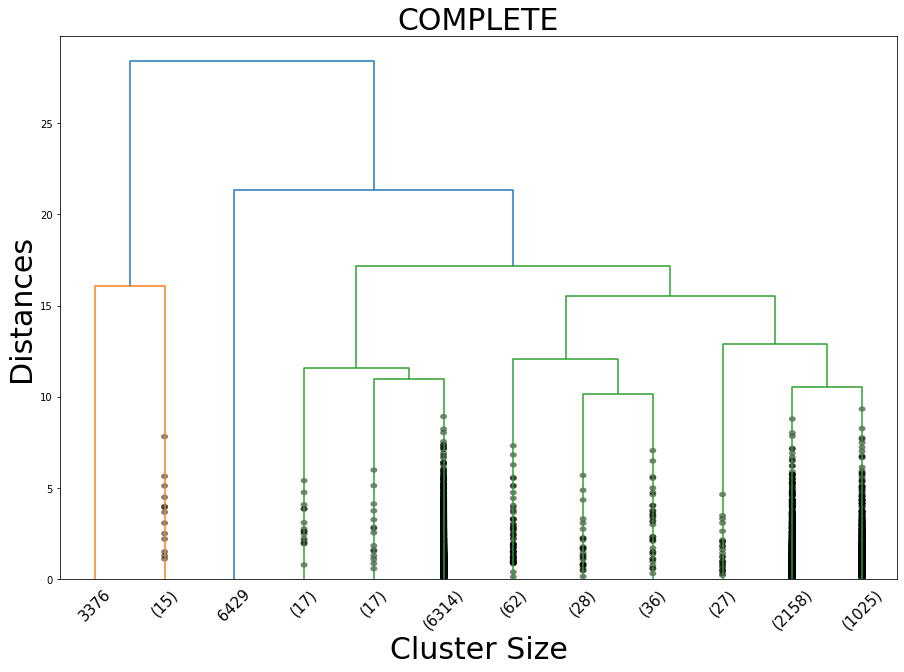

In [45]:
plt.figure(figsize=(15,10))
Z=linkage(test[1000:],method='complete')
print("Z-Shape:",Z.shape)
plt.title("COMPLETE",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=True,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

Z-Shape: (9700, 4)


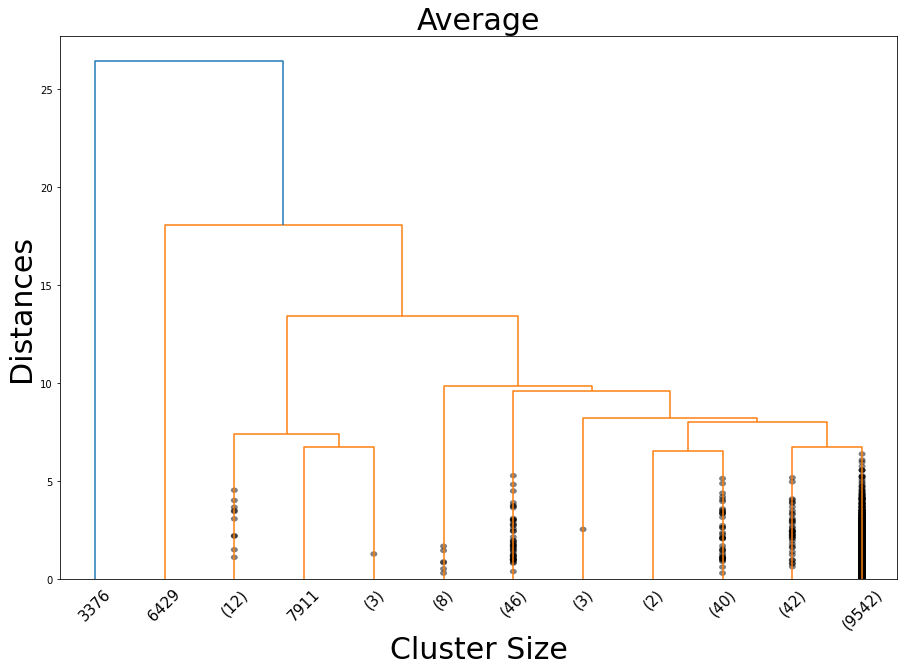

In [46]:
plt.figure(figsize=(15,10))
Z=linkage(test[1000:],method='average')
print("Z-Shape:",Z.shape)
plt.title("Average",loc='center',size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=True,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

Z-Shape: (9700, 4)


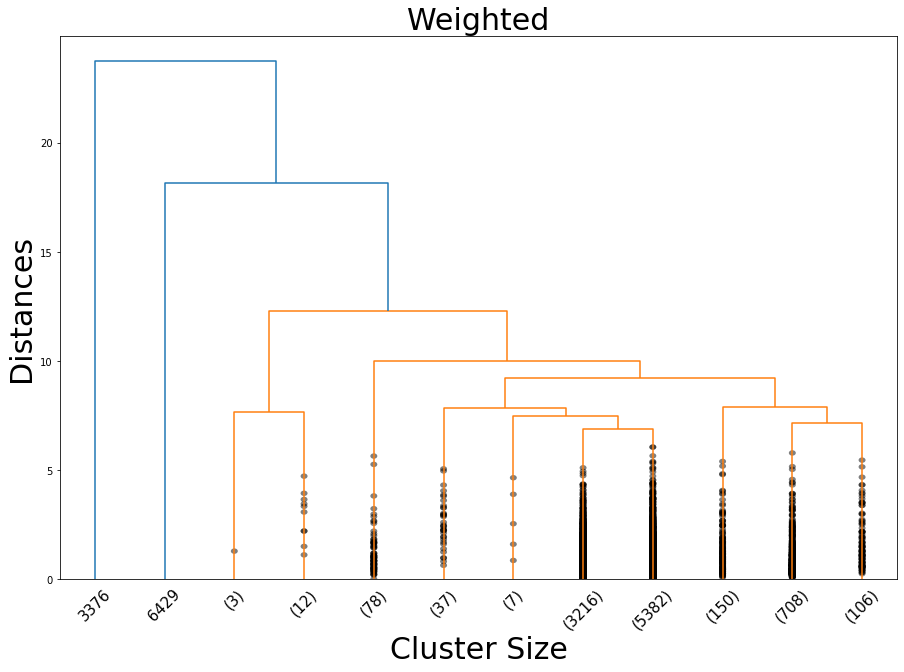

In [47]:
plt.figure(figsize=(15,10))
Z=linkage(test[1000:],method='weighted')
print("Z-Shape:",Z.shape)
plt.title("Weighted",loc='center',size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=True,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
Z=linkage(test[1000:],method='centroid')
print("Z-Shape:",Z.shape)
plt.title("CENTROID",loc='center',size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=True,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
Z=linkage(test[1000:],method='ward')
print("Z-Shape:",Z.shape)
plt.title("WARD",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=True,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.axhline(y=500)
plt.axhline(y=1500)
plt.show()